# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)
0
(10000, 28, 28)
(10000,)


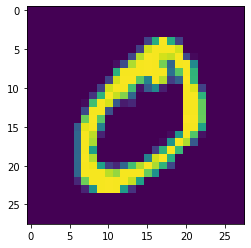

In [4]:
print(X_train.shape)
print(Y_train[1])
print(X_test.shape)
print(Y_test.shape)

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, 1, activation='relu'))

model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 128)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.1130 - acc: 0.9651
Epoch 2/10
60000/60000 [==============================] - 39s 643us/step - loss: 0.0397 - acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0282 - acc: 0.9913
Epoch 4/10
60000/60000 [==============================] - 38s 632us/step - loss: 0.0209 - acc: 0.9935
Epoch 5/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.0161 - acc: 0.9948
Epoch 6/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.0145 - acc: 0.9955
Epoch 7/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0114 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.0094 - acc: 0.9971
Epoch 9/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.0090 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 38s 628us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print(score)

[0.03235975071003136, 0.9923]


In [0]:
Y_pred = model.predict(X_test)

In [23]:
print(Y_pred[:9])
print(Y_test[:9])

[[1.57449010e-12 4.16348696e-16 7.64479660e-11 6.05352790e-09
  1.68018364e-20 6.29050673e-17 2.04576427e-21 1.00000000e+00
  5.69780937e-15 8.95540753e-10]
 [5.29830303e-12 1.23986765e-10 1.00000000e+00 3.81545652e-14
  1.19942962e-16 3.66007194e-20 1.99702335e-08 2.12361400e-17
  3.90713910e-13 6.44518371e-18]
 [8.39780120e-11 1.00000000e+00 1.03526769e-08 1.17974022e-12
  1.99180977e-10 9.88201396e-11 2.15644967e-11 2.16328644e-09
  5.25684873e-09 5.00616963e-13]
 [1.00000000e+00 1.24194769e-18 1.20989568e-12 1.74080409e-13
  9.16576586e-18 8.70929644e-14 6.64556798e-10 1.41496600e-14
  8.87973885e-13 6.36943998e-10]
 [1.89530081e-15 2.91351064e-15 3.55895107e-16 1.61111860e-15
  1.00000000e+00 4.06817054e-17 8.97204932e-16 2.85863032e-15
  5.41979656e-14 3.67068572e-12]
 [5.60727766e-12 1.00000000e+00 1.82983595e-09 5.26712022e-15
  5.90048219e-11 2.72179553e-14 4.45419119e-14 6.55716020e-12
  1.11591333e-10 7.49083345e-14]
 [5.97187541e-19 1.32878908e-09 1.52280239e-12 2.15573167e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()